<a href="https://colab.research.google.com/github/Anuththara99/Anuththara99/blob/master/TeleDerm_ClassificationMobileNetCopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import pandas to load our dataset
import pandas as pd

In [ ]:
# to check which GPU has been allocated 
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
#to check tensorflow version
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization,ReLU,DepthwiseConv2D,AvgPool2D,GlobalAveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from sklearn import metrics

# Importing Dataset

In [ ]:
# Defining the path for train and test images

data_dir_train = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Train/")
data_dir_test = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Test/")
data_dir_aug_train = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/")
data_dir_aug_test = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Test/")
data_dir_cus_aug_train = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Customize_Augmentation/Train/")
data_dir_cus_aug_test = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Customize_Augmentation/Test/")

## Count Dataset

In [ ]:
#Count dataset 
image_count_train = len(list(data_dir_aug_train.glob('*/*.jpg')))
print("Train Data: ",image_count_train)
image_count_test = len(list(data_dir_aug_test.glob('*/*.jpg')))
print("Test Data: ",image_count_test)

In [ ]:
# Define parameters for the loader
batch_size = 32
img_height = 128
img_width = 128 
# size = (224, 224)

# Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show
import numpy as np
import os
from PIL import Image
from skimage import io 


# save_train_folder = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/Sample/Augt/")
# image_directory = 'multi_images/'
SIZE = 256
dataset = [] 


datagen = ImageDataGenerator(        
            rotation_range=45, # Randomly rotate the image between 0 and 45 degrees
            width_shift_range=0.2, # Shift the image along X-axis by 20% 
            height_shift_range=0.2, # and Y-axis by 20%    
            shear_range=0.2, # Shear transformation slants the shape of the image      
            zoom_range=0.2, # A zoom less than 1.0 magnifies the image, while a zoom greater than 1.0 zooms out of the image.     
            horizontal_flip=True, #The generator will generate images, which on a random basis, will be horizontally flipped.        
            fill_mode='constant', cval=125) #The constant value is specified by the cval argument.

# datagen = ImageDataGenerator(        
#             rotation_range=45,
#             width_shift_range=0.3,  
#             height_shift_range=0.3,    
#             shear_range=0.25,        
#             zoom_range=0.25,        
#             horizontal_flip=True,         
#             fill_mode='reflect')

## Multiple classes 

In [ ]:
save_train_folder = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Augmented/Train/")

for class_folder in os.listdir(data_dir_train):
  class_path = data_dir_train / class_folder
  print("class path : ",class_path)
  save_path = save_train_folder / class_folder
  print("save_path : ",save_path)
  my_images = os.listdir(class_path)
  dataset = []
  for i, image_name in enumerate(my_images): 
    image_location =   class_path / image_name 
    print("image_location : ",image_location)
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_location)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image)) 

        x = np.array(dataset)
        i = 0
        for batch in datagen.flow(x, batch_size=20,
                                  save_to_dir=save_path,
                                  save_prefix='aug',
                                  save_format='jpg'):
            i+=1
            if i > 19: #Epochs
                break 


NameError: ignored

## single classes

In [ ]:
save_train_folder = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Augmented/Train/Eczema/")

class_path = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/")
print("class path : ",class_path)
my_images = os.listdir(class_path)
dataset = []
count = 0 
for i, image_name in enumerate(my_images): 
  image_location =   class_path / image_name 
  count = count + 1
  print(count," : image_location : ",image_location)
  # print("image count : ",count)
  if (image_name.split('.')[1] == 'jpg'):        
      image = io.imread(image_location)        
      image = Image.fromarray(image, 'RGB')        
      image = image.resize((SIZE,SIZE)) 
      dataset.append(np.array(image)) 

      x = np.array(dataset)
      i = 0
      for batch in datagen.flow(x, batch_size=20,
                                save_to_dir=save_train_folder,
                                save_prefix='aug_eczema',
                                save_format='jpg'):
          i+=1
          if i > 19: #Epochs
              break 


class path :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18
1  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0885.jpg
2  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0864.jpg
3  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0855.jpg
4  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0899.jpg
5  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0874.jpg
6  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0900.jpg
7  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0857.jpg
8  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0858.jpg
9  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0896.jpg
10  : image_location :  /content/drive/MyDrive/FYP_DATASET/TeleDerm/Temp/Eczema/f18/0897.jpg
11  :

In [ ]:
#Count dataset 
augmented_folder_A = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Augmented/Train/")
image_count_train = len(list(augmented_folder_A.glob('*/*.jpg')))
print(image_count_train)

# Image Augmentation with Skimage 

In [ ]:
from skimage import transform
from skimage.transform import rotate, AffineTransform,warp
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import random
from skimage import img_as_ubyte
import os
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.transform import rotate
from scipy import ndimage
from skimage.exposure import adjust_gamma
import numpy as np 
from skimage.color import rgb2gray
from skimage import exposure
from skimage import util

In [ ]:
# Set up input and output directories
input_dir = '/content/drive/MyDrive/FYP_DATASET/TeleDerm/Train/Monkeypox/'
output_dir = '/content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for filename in os.listdir(input_dir):
    if filename.endswith('.jpg'):  # or other image file types
        # Read in the input image
        img = imread(os.path.join(input_dir, filename))
        print('img : ',filename)
        
        #save orginal image
        orginal_filename = os.path.join(output_dir, filename)
        imsave(orginal_filename,img)

        # Apply the shear transformation
        # tf = AffineTransform(shear=shear_factor)
        # sheared = warp(img, tf, mode='wrap')

        #Apply Rotation 
        angles = [15,30, 45, 60, 90, 120, 180, 270]
        # fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
        # axes = axes.ravel()

        for i, angle in enumerate(angles):
            rotated = rotate(img, angle=angle)
            color_inversion_output_filename = os.path.join(output_dir, 'augmented_'+str(i)+_ +filename)
            # Save the modified image to the output directory
            imsave(color_inversion_output_filename, rotated)
            # axes[i].imshow(rotated, cmap='gray')
            # axes[i].set_title(f'Rotate {angle}')
        
        #Apply color invention 
        color_inversion = util.invert(img)
        color_inversion_output_filename = os.path.join(output_dir, 'augmented_9_' +filename)
        # Save the modified image to the output directory
        imsave(color_inversion_output_filename, color_inversion)

        # Apply the gamma correction transformation
        gamma_corrected = exposure.adjust_gamma(img, gamma=0.5, gain=1)
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_10_'+filename)
        imsave(output_filename, gamma_corrected)

        #better_contrast 
        v_min, v_max = np.percentile(img, (0.2, 99.8))
        better_contrast = exposure.rescale_intensity(img, in_range=(v_min, v_max))
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_11_'+filename)
        imsave(output_filename, better_contrast)
     
        #Gamma correction
        adjusted_gamma_image = exposure.adjust_gamma(img, gamma=0.4, gain=0.9)        
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_12_'+filename)
        imsave(output_filename, adjusted_gamma_image)

        #GreyScale
        if not img.ndim == 2:
          gray_scale_image = rgb2gray(img)
          # Save the modified image to the output directory
          output_filename = os.path.join(output_dir, 'augmented_13_'+filename)
          imsave(output_filename, gray_scale_image)

        #Image Shearing 
        # Define the shear parameters
        shear_factor = 0.2  # increase this value for more shear
        tf = AffineTransform(shear=shear_factor)
        # Apply the shear transformation
        sheared = warp(img, tf, mode='wrap')
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_14_'+filename)
        imsave(output_filename, sheared)


        #Affine Transformation(warping)
        transform = AffineTransform(translation=(-200,0)) 
        # (-200,0) are x and y coordinate, change it see the effect
        warp_image = warp(img,transform, mode="wrap") #mode parameter is optional
        # mode= {'constant', 'edge', 'symmetric', 'reflect', 'wrap'}
        #these are possible values of mode, you can try them and decide 
        #which one to use, default value for mode is constant
        # warp_fig = plot_side(img,warp_image , 'Original', 'Wrap image')
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_15_'+filename)
        imsave(output_filename, warp_image)

        #Image Noise 
        # Add noise with a smaller var value
        noisy_image1 = random_noise(img, var=0.005)
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_16_'+filename)
        imsave(output_filename, noisy_image1)

        noisy_image2 = random_noise(img, var=0.002)
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_17_'+filename)
        imsave(output_filename, noisy_image2)
        # Add noise with a smaller var value
        noisy_image3 = random_noise(img, var=0.008)
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_18_'+filename)
        imsave(output_filename, noisy_image3)

        #image Blurring
        blured_image = ndimage.uniform_filter(img, size=(11, 11, 1))
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_19_'+filename)
        imsave(output_filename, blured_image)

        # Increase the brightness by setting gamma < 1
        brightened = adjust_gamma(img, gamma=0.8)
         # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_20_'+filename)
        imsave(output_filename, brightened)

        # Decrease the brightness by setting gamma > 1
        darkened = adjust_gamma(img, gamma=1.5)
         # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_21_'+filename)
        imsave(output_filename, darkened)

        # Decrease the brightness by setting gamma > 1
        darkened_low = adjust_gamma(img, gamma=1.2)
         # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_22_'+filename)
        imsave(output_filename, darkened_low)

         # Decrease the brightness by setting gamma > 1
        darkened_High = adjust_gamma(img, gamma=1.8)
         # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_23_'+filename)
        imsave(output_filename, darkened_High)

        up_down = np.flipud(img)
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_24_'+filename)
        imsave(output_filename, up_down)

        # Increasing the contrast of the Image
        # Note: Here we add 100/255 since we scaled Intensity 
        #values of Image when loading (by dividing it 255)
        highC = img * 3
        # Save the modified image to the output directory
        output_filename = os.path.join(output_dir, 'augmented_25_'+filename)
        imsave(output_filename, highC)

img :  1279.jpg


img :  1282.jpg


img :  1313.jpg


img :  1297.jpg


img :  1317.jpg


img :  1272.jpg


img :  1299.jpg


img :  1328.jpg


<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_1328.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  1323.jpg


img :  1310.jpg


img :  1303.jpg


img :  1271.jpg


img :  1275.jpg


img :  1295.jpg


img :  1315.jpg


img :  1292.jpg


img :  1285.jpg


img :  1318.jpg


img :  1321.jpg


img :  1283.jpg


img :  1301.jpg


img :  1284.jpg


img :  1294.jpg


img :  1320.jpg


img :  1316.jpg


img :  1281.jpg


img :  1276.jpg


img :  1389.jpg


img :  1354.jpg


img :  1393.jpg


img :  1365.jpg


img :  1348.jpg


img :  1375.jpg


<ipython-input-11-37b46bb43004>:44: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_10_1333.jpg is a low contrast image
  imsave(output_filename, gamma_corrected)
<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_1333.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  1333.jpg


<ipython-input-11-37b46bb43004>:110: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_19_1333.jpg is a low contrast image
  imsave(output_filename, blured_image)
<ipython-input-11-37b46bb43004>:116: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_20_1333.jpg is a low contrast image
  imsave(output_filename, brightened)


img :  1364.jpg


img :  1362.jpg


img :  1394.jpg


img :  1363.jpg


img :  1353.jpg


img :  1350.jpg


img :  1360.jpg


img :  1338.jpg


img :  1343.jpg


img :  1386.jpg


img :  1367.jpg


img :  1332.jpg


img :  1342.jpg


img :  1340.jpg


img :  1395.jpg


img :  1352.jpg


img :  1397.jpg


img :  1377.jpg


img :  1356.jpg


img :  1349.jpg


img :  1346.jpg


img :  1339.jpg


img :  1359.jpg


img :  1384.jpg


img :  1387.jpg


img :  1368.jpg


img :  1381.jpg


img :  1351.jpg


img :  1378.jpg


img :  1335.jpg


img :  1371.jpg


img :  1372.jpg


img :  1382.jpg


img :  1391.jpg


img :  1358.jpg


img :  1380.jpg


img :  1366.jpg


img :  1379.jpg


img :  1355.jpg


img :  1392.jpg


img :  1341.jpg


img :  1330.jpg


img :  1370.jpg


img :  1390.jpg


img :  1331.jpg


img :  1361.jpg


img :  1383.jpg


img :  1344.jpg


img :  1334.jpg


<ipython-input-11-37b46bb43004>:44: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_10_1334.jpg is a low contrast image
  imsave(output_filename, gamma_corrected)
<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_1334.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  1369.jpg


img :  1385.jpg


img :  1345.jpg


img :  1374.jpg


img :  1373.jpg


img :  1336.jpg


img :  1376.jpg


img :  1416.jpg


img :  1414.jpg


img :  1423.jpg


img :  1439.jpg


img :  1404.jpg


img :  1430.jpg


img :  1446.jpg


img :  1408.jpg


img :  1426.jpg


img :  1459.jpg


img :  1438.jpg


img :  1402.jpg


img :  1422.jpg


img :  1450.jpg


img :  1453.jpg


img :  1401.jpg


img :  1443.jpg


img :  1413.jpg


img :  1407.jpg


img :  1419.jpg


img :  1428.jpg


img :  1409.jpg


img :  1457.jpg


img :  1418.jpg


img :  1442.jpg


img :  1429.jpg


img :  1410.jpg


img :  1437.jpg


img :  1447.jpg


img :  1411.jpg


img :  1406.jpg


img :  1449.jpg


img :  1432.jpg


img :  1433.jpg


img :  1398.jpg


img :  1425.jpg


img :  1444.jpg


img :  1427.jpg


img :  1448.jpg


img :  1456.jpg


img :  1460.jpg


img :  1431.jpg


img :  1400.jpg


img :  1441.jpg


img :  1424.jpg


img :  1417.jpg


img :  1451.jpg


img :  1452.jpg


img :  1421.jpg


img :  1399.jpg


img :  1458.jpg


img :  1403.jpg


img :  1461.jpg


img :  1435.jpg


img :  1434.jpg


img :  1455.jpg


img :  1415.jpg


img :  1440.jpg


img :  1465.jpg


img :  1464.jpg


img :  1468.jpg


img :  1466.jpg


img :  1463.jpg


img :  1467.jpg


img :  110.jpg


img :  74.jpg


img :  59.jpg


img :  62.jpg


img :  78.jpg


img :  97.jpg


img :  67.jpg


img :  102.jpg


img :  89.jpg


img :  61.jpg


img :  90.jpg


img :  77.jpg


img :  75.jpg


img :  82.jpg


img :  81.jpg


img :  86.jpg


img :  107.jpg


img :  70.jpg


img :  101.jpg


img :  50.jpg


img :  85.jpg


img :  65.jpg


img :  95.jpg


img :  106.jpg


img :  45.jpg


img :  108.jpg


img :  49.jpg


img :  55.jpg


img :  47.jpg


img :  68.jpg


img :  52.jpg


img :  100.jpg


img :  60.jpg


img :  51.jpg


img :  76.jpg


img :  87.jpg


img :  53.jpg


img :  79.jpg


img :  105.jpg


<ipython-input-11-37b46bb43004>:44: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_10_105.jpg is a low contrast image
  imsave(output_filename, gamma_corrected)
<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_105.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  64.jpg


img :  92.jpg


img :  72.jpg


img :  66.jpg


img :  104.jpg


img :  58.jpg


img :  88.jpg


img :  96.jpg


img :  80.jpg


img :  56.jpg


img :  57.jpg


img :  99.jpg


img :  44.jpg


img :  93.jpg


img :  54.jpg


img :  103.jpg


img :  91.jpg


img :  73.jpg


<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_73.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  71.jpg


img :  46.jpg


img :  94.jpg


img :  63.jpg


img :  84.jpg


img :  69.jpg


img :  98.jpg


img :  48.jpg


img :  83.jpg


img :  134.jpg


img :  119.jpg


img :  111.jpg


img :  127.jpg


img :  125.jpg


img :  129.jpg


img :  124.jpg


img :  121.jpg


img :  131.jpg


img :  117.jpg


img :  138.jpg


img :  143.jpg


img :  113.jpg


img :  114.jpg


img :  122.jpg


img :  112.jpg


img :  141.jpg


img :  142.jpg


img :  136.jpg


img :  115.jpg


img :  130.jpg


img :  116.jpg


img :  140.jpg


img :  118.jpg


img :  128.jpg


img :  133.jpg


img :  139.jpg


img :  145.jpg


img :  135.jpg


img :  120.jpg


img :  137.jpg


img :  123.jpg


img :  144.jpg


img :  132.jpg


img :  126.jpg


img :  312.jpg


img :  400.jpg


img :  361.jpg


img :  385.jpg


img :  372.jpg


img :  377.jpg


img :  321.jpg


img :  381.jpg


img :  345.jpg


img :  355.jpg


img :  397.jpg


img :  387.jpg


img :  362.jpg


img :  363.jpg


img :  393.jpg


img :  331.jpg


img :  342.jpg


img :  308.jpg


img :  396.jpg


img :  357.jpg


img :  398.jpg


img :  394.jpg


img :  391.jpg


img :  344.jpg


img :  360.jpg


img :  316.jpg


img :  399.jpg


img :  319.jpg


img :  371.jpg


img :  373.jpg


img :  318.jpg


img :  347.jpg


img :  315.jpg


img :  368.jpg


img :  324.jpg


img :  369.jpg


img :  337.jpg


img :  334.jpg


img :  310.jpg


img :  365.jpg


img :  358.jpg


img :  379.jpg


img :  322.jpg


img :  366.jpg


img :  351.jpg


img :  333.jpg


img :  370.jpg


img :  307.jpg


img :  390.jpg


img :  350.jpg


img :  346.jpg


img :  392.jpg


img :  378.jpg


img :  338.jpg


img :  380.jpg


img :  313.jpg


img :  320.jpg


img :  329.jpg


img :  367.jpg


img :  335.jpg


img :  395.jpg


img :  328.jpg


img :  327.jpg


img :  323.jpg


img :  359.jpg


img :  353.jpg


img :  343.jpg


img :  314.jpg


img :  341.jpg


img :  401.jpg


img :  383.jpg


img :  389.jpg


img :  356.jpg


img :  336.jpg


img :  402.jpg


img :  348.jpg


img :  386.jpg


img :  349.jpg


img :  330.jpg


img :  326.jpg


img :  382.jpg


img :  388.jpg


img :  375.jpg


img :  352.jpg


img :  340.jpg


img :  311.jpg


img :  374.jpg


img :  317.jpg


img :  364.jpg


img :  332.jpg


img :  376.jpg


img :  384.jpg


img :  306.jpg


img :  339.jpg


img :  309.jpg


img :  354.jpg


img :  325.jpg


img :  424.jpg


img :  412.jpg


img :  441.jpg


img :  453.jpg


img :  464.jpg


img :  404.jpg


img :  458.jpg


img :  485.jpg


img :  484.jpg


img :  470.jpg


img :  463.jpg


img :  455.jpg


img :  432.jpg


img :  407.jpg


img :  405.jpg


img :  446.jpg


img :  431.jpg


img :  409.jpg


img :  492.jpg


img :  416.jpg


img :  445.jpg


img :  451.jpg


img :  443.jpg


img :  419.jpg


img :  488.jpg


img :  406.jpg


img :  456.jpg


img :  411.jpg


img :  450.jpg


img :  494.jpg


img :  413.jpg


img :  410.jpg


img :  444.jpg


img :  474.jpg


img :  478.jpg


<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_478.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  422.jpg


img :  459.jpg


img :  437.jpg


img :  420.jpg


img :  495.jpg


img :  430.jpg


img :  471.jpg


img :  469.jpg


img :  479.jpg


img :  461.jpg


img :  421.jpg


img :  433.jpg


img :  466.jpg


img :  448.jpg


img :  487.jpg


img :  493.jpg


img :  434.jpg


img :  480.jpg


img :  435.jpg


img :  438.jpg


img :  426.jpg


img :  440.jpg


img :  436.jpg


img :  417.jpg


img :  465.jpg


img :  472.jpg


img :  477.jpg


<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_477.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  408.jpg


img :  489.jpg


img :  482.jpg


img :  486.jpg


img :  460.jpg


img :  414.jpg


img :  415.jpg


img :  439.jpg


img :  442.jpg


img :  447.jpg


img :  483.jpg


img :  457.jpg


img :  491.jpg


img :  476.jpg


img :  427.jpg


img :  490.jpg


img :  429.jpg


img :  425.jpg


img :  403.jpg


img :  449.jpg


img :  428.jpg


img :  423.jpg


img :  473.jpg


img :  454.jpg


img :  467.jpg


img :  462.jpg


img :  468.jpg


img :  481.jpg


img :  418.jpg


img :  452.jpg


img :  475.jpg


img :  500.jpg


img :  501.jpg


img :  543.jpg


img :  528.jpg


img :  567.jpg


img :  530.jpg


img :  531.jpg


img :  538.jpg


img :  557.jpg


img :  519.jpg


img :  527.jpg


img :  563.jpg


img :  536.jpg


img :  534.jpg


img :  551.jpg


img :  533.jpg


img :  514.jpg


img :  504.jpg


img :  565.jpg


img :  555.jpg


img :  532.jpg


img :  502.jpg


img :  517.jpg


img :  560.jpg


img :  552.jpg


img :  503.jpg


img :  505.jpg


img :  544.jpg


img :  561.jpg


img :  497.jpg


img :  541.jpg


img :  554.jpg


img :  506.jpg


img :  507.jpg


img :  549.jpg


img :  545.jpg


img :  556.jpg


img :  558.jpg


img :  550.jpg


img :  537.jpg


img :  510.jpg


img :  564.jpg


img :  542.jpg


img :  539.jpg


img :  521.jpg


img :  568.jpg


img :  524.jpg


img :  548.jpg


img :  518.jpg


img :  529.jpg


img :  496.jpg


img :  513.jpg


img :  525.jpg


img :  562.jpg


img :  515.jpg


img :  526.jpg


img :  553.jpg


img :  522.jpg


img :  540.jpg


img :  516.jpg


img :  559.jpg


img :  523.jpg


img :  546.jpg


img :  512.jpg


img :  508.jpg


img :  535.jpg


img :  569.jpg


img :  499.jpg


img :  547.jpg


img :  498.jpg


img :  520.jpg


img :  509.jpg


img :  566.jpg


img :  511.jpg


img :  152.jpg


img :  200.jpg


img :  173.jpg


img :  171.jpg


img :  165.jpg


img :  176.jpg


img :  156.jpg


img :  159.jpg


img :  153.jpg


img :  169.jpg


img :  154.jpg


img :  186.jpg


img :  148.jpg


img :  179.jpg


img :  155.jpg


img :  166.jpg


img :  161.jpg


img :  170.jpg


img :  178.jpg


img :  150.jpg


img :  185.jpg


img :  184.jpg


img :  187.jpg


img :  160.jpg


img :  194.jpg


img :  175.jpg


img :  174.jpg


img :  199.jpg


img :  188.jpg


img :  182.jpg


img :  196.jpg


img :  147.jpg


img :  189.jpg


img :  163.jpg


img :  164.jpg


img :  162.jpg


img :  193.jpg


img :  149.jpg


img :  181.jpg


img :  158.jpg


img :  167.jpg


img :  195.jpg


img :  157.jpg


img :  190.jpg


img :  177.jpg


img :  183.jpg


img :  198.jpg


img :  197.jpg


img :  168.jpg


img :  180.jpg


img :  146.jpg


img :  192.jpg


img :  191.jpg


img :  172.jpg


img :  151.jpg


img :  208.jpg


img :  232.jpg


img :  211.jpg


img :  240.jpg


img :  229.jpg


img :  274.jpg


img :  299.jpg


img :  245.jpg


img :  222.jpg


img :  224.jpg


img :  276.jpg


img :  221.jpg


img :  287.jpg


img :  281.jpg


img :  231.jpg


img :  243.jpg


img :  227.jpg


img :  213.jpg


img :  257.jpg


img :  253.jpg


img :  259.jpg


img :  289.jpg


img :  204.jpg


img :  271.jpg


img :  256.jpg


img :  270.jpg


img :  207.jpg


img :  294.jpg


img :  217.jpg


img :  246.jpg


img :  290.jpg


img :  278.jpg


img :  251.jpg


img :  279.jpg


img :  223.jpg


img :  280.jpg


img :  269.jpg


img :  297.jpg


img :  238.jpg


img :  205.jpg


img :  216.jpg


img :  247.jpg


img :  255.jpg


img :  292.jpg


img :  225.jpg


img :  285.jpg


img :  288.jpg


img :  273.jpg


img :  261.jpg


img :  201.jpg


img :  265.jpg


img :  248.jpg


img :  218.jpg


img :  202.jpg


img :  239.jpg


img :  233.jpg


img :  212.jpg


img :  235.jpg


img :  210.jpg


img :  267.jpg


img :  284.jpg


img :  203.jpg


img :  264.jpg


img :  277.jpg


img :  254.jpg


img :  272.jpg


img :  260.jpg


img :  230.jpg


img :  252.jpg


img :  266.jpg


img :  242.jpg


img :  295.jpg


img :  275.jpg


img :  237.jpg


img :  206.jpg


img :  219.jpg


img :  241.jpg


img :  220.jpg


img :  293.jpg


img :  244.jpg


img :  226.jpg


img :  283.jpg


img :  214.jpg


img :  215.jpg


img :  209.jpg


img :  298.jpg


img :  282.jpg


img :  228.jpg


img :  291.jpg


img :  250.jpg


img :  236.jpg


img :  234.jpg


img :  258.jpg


img :  263.jpg


img :  286.jpg


img :  249.jpg


img :  296.jpg


img :  268.jpg


img :  262.jpg


img :  303.jpg


img :  305.jpg


img :  304.jpg


img :  301.jpg


img :  302.jpg


img :  300.jpg


img :  664.jpg


img :  784.jpg


img :  842.jpg


img :  809.jpg


img :  589.jpg


img :  835.jpg


img :  608.jpg


img :  840.jpg


img :  787.jpg


img :  790.jpg


img :  783.jpg


img :  799.jpg


img :  602.jpg


img :  653.jpg


img :  622.jpg


img :  841.jpg


img :  634.jpg


img :  627.jpg


img :  597.jpg


img :  791.jpg


img :  827.jpg


img :  633.jpg


img :  587.jpg


img :  656.jpg


img :  858.jpg


img :  800.jpg


img :  659.jpg


img :  651.jpg


img :  623.jpg


img :  628.jpg


img :  810.jpg


img :  838.jpg


img :  644.jpg


img :  692.jpg


img :  804.jpg


img :  829.jpg


img :  591.jpg


img :  831.jpg


img :  807.jpg


img :  645.jpg


img :  825.jpg


img :  615.jpg


img :  806.jpg


img :  714.jpg


img :  801.jpg


img :  649.jpg


img :  639.jpg


img :  820.jpg


img :  612.jpg


img :  647.jpg


img :  725.jpg


img :  814.jpg


img :  837.jpg


img :  853.jpg


img :  795.jpg


img :  796.jpg


img :  826.jpg


img :  794.jpg


img :  786.jpg


img :  616.jpg


img :  642.jpg


img :  594.jpg


img :  769.jpg


img :  824.jpg


img :  661.jpg


img :  648.jpg


img :  856.jpg


img :  663.jpg


img :  609.jpg


img :  854.jpg


img :  624.jpg


img :  833.jpg


img :  625.jpg


img :  655.jpg


img :  614.jpg


img :  621.jpg


img :  818.jpg


img :  798.jpg


img :  803.jpg


img :  805.jpg


img :  785.jpg


img :  665.jpg


img :  620.jpg


img :  780.jpg


img :  823.jpg


img :  822.jpg


img :  632.jpg


img :  855.jpg


img :  850.jpg


img :  662.jpg


img :  828.jpg


img :  830.jpg


img :  839.jpg


img :  610.jpg


img :  580.jpg


img :  792.jpg


img :  593.jpg


img :  844.jpg


img :  646.jpg


img :  680.jpg


img :  606.jpg


img :  848.jpg


img :  637.jpg


img :  660.jpg


img :  607.jpg


img :  635.jpg


img :  793.jpg


img :  857.jpg


img :  619.jpg


img :  836.jpg


img :  595.jpg


img :  747.jpg


img :  845.jpg


img :  811.jpg


img :  815.jpg


img :  832.jpg


img :  846.jpg


img :  596.jpg


img :  638.jpg


img :  641.jpg


img :  758.jpg


img :  813.jpg


img :  601.jpg


img :  652.jpg


img :  631.jpg


img :  581.jpg


img :  834.jpg


img :  703.jpg


img :  782.jpg


img :  657.jpg


img :  843.jpg


img :  598.jpg


img :  669.jpg


img :  650.jpg


img :  613.jpg


img :  658.jpg


img :  666.jpg


img :  812.jpg


img :  788.jpg


img :  626.jpg


img :  852.jpg


img :  630.jpg


img :  605.jpg


img :  643.jpg


img :  819.jpg


img :  808.jpg


img :  851.jpg


img :  586.jpg


img :  816.jpg


img :  592.jpg


img :  582.jpg


img :  636.jpg


img :  654.jpg


img :  584.jpg


img :  611.jpg


img :  618.jpg


img :  736.jpg


img :  817.jpg


img :  599.jpg


img :  849.jpg


img :  590.jpg


img :  821.jpg


img :  600.jpg


img :  802.jpg


img :  617.jpg


img :  691.jpg


img :  629.jpg


img :  604.jpg


img :  847.jpg


img :  781.jpg


img :  603.jpg


img :  585.jpg


img :  789.jpg


img :  583.jpg


img :  640.jpg


img :  588.jpg


img :  704.jpg


img :  775.jpg


img :  681.jpg


img :  698.jpg


img :  713.jpg


img :  734.jpg


img :  687.jpg


img :  764.jpg


img :  745.jpg


img :  772.jpg


img :  779.jpg


img :  678.jpg


img :  693.jpg


img :  720.jpg


img :  697.jpg


img :  743.jpg


img :  719.jpg


img :  731.jpg


img :  709.jpg


img :  765.jpg


img :  718.jpg


img :  755.jpg


img :  712.jpg


img :  774.jpg


img :  727.jpg


img :  722.jpg


img :  738.jpg


img :  732.jpg


img :  702.jpg


img :  748.jpg


img :  730.jpg


img :  711.jpg


img :  744.jpg


img :  699.jpg


img :  752.jpg


img :  694.jpg


img :  677.jpg


img :  754.jpg


img :  761.jpg


img :  671.jpg


img :  759.jpg


img :  776.jpg


img :  690.jpg


img :  762.jpg


img :  751.jpg


img :  737.jpg


img :  760.jpg


img :  707.jpg


img :  742.jpg


img :  723.jpg


img :  741.jpg


img :  739.jpg


img :  682.jpg


img :  728.jpg


img :  735.jpg


img :  673.jpg


img :  689.jpg


img :  753.jpg


<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_753.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  708.jpg


img :  750.jpg


img :  721.jpg


img :  672.jpg


img :  724.jpg


img :  683.jpg


img :  716.jpg


img :  729.jpg


img :  710.jpg


img :  679.jpg


img :  773.jpg


img :  726.jpg


img :  757.jpg


img :  767.jpg


<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_767.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  746.jpg


img :  733.jpg


img :  706.jpg


img :  674.jpg


img :  771.jpg


img :  715.jpg


img :  688.jpg


img :  705.jpg


img :  717.jpg


img :  700.jpg


img :  763.jpg


img :  740.jpg


img :  778.jpg


img :  676.jpg


img :  770.jpg


img :  686.jpg


img :  756.jpg


img :  777.jpg


img :  685.jpg


img :  696.jpg


img :  766.jpg


img :  668.jpg


img :  749.jpg


img :  670.jpg


img :  675.jpg


img :  684.jpg


img :  695.jpg


img :  768.jpg


<ipython-input-11-37b46bb43004>:57: UserWarning: /content/drive/MyDrive/FYP_DATASET/TeleDerm/Augment_Skimage/Train/Monkeypox/augmented_12_768.jpg is a low contrast image
  imsave(output_filename, adjusted_gamma_image)


img :  667.jpg


img :  701.jpg


img :  25.jpg


img :  19.jpg


img :  17.jpg


img :  37.jpg


img :  10.jpg


img :  39.jpg


img :  9.jpg


img :  31.jpg


img :  14.jpg


img :  2.jpg


img :  40.jpg


img :  3.jpg


img :  4.jpg


img :  5.jpg


img :  6.jpg


img :  15.jpg


img :  8.jpg


img :  20.jpg


img :  32.jpg


img :  42.jpg


img :  11.jpg


img :  22.jpg


img :  13.jpg


img :  33.jpg


img :  24.jpg


img :  28.jpg


img :  7.jpg


img :  29.jpg


img :  35.jpg


img :  12.jpg


img :  30.jpg


img :  26.jpg


img :  16.jpg


img :  43.jpg


img :  23.jpg


img :  41.jpg


img :  21.jpg


img :  27.jpg


img :  18.jpg


img :  38.jpg


img :  34.jpg


img :  1.jpg


img :  36.jpg


img :  574.jpg


RuntimeError: ignored

## Image Resize

In [ ]:
# image resize

def preprocess_image(image):
    image = tf.image.resize(image, size)
    return image  

    
class_path = pathlib.Path("/content/drive/MyDrive/FYP_DATASET/TeleDerm/Train/Acne/")
# class_path = data_dir_train / "Acne"
for image_path in class_path.glob("*.jpg"):
    image = tf.io.read_file(str(image_path))
    image = tf.image.decode_jpeg(image)
    image = preprocess_image(image)
    image = tf.image.encode_jpeg(tf.cast(image, tf.uint8))
    # tf.io.write_file(str(data_dir_train / "resized" / class_folder / image_path.name), image)
    #use this code to replace 
    tf.io.write_file(str(image_path), image)     


# for class_folder in os.listdir(data_dir_train):
#     class_path = data_dir_train / class_folder
#     for image_path in class_path.glob("*.jpg"):
#         image = tf.io.read_file(str(image_path))
#         image = tf.image.decode_jpeg(image)
#         image = preprocess_image(image)
#         image = tf.image.encode_jpeg(tf.cast(image, tf.uint8))
#         # tf.io.write_file(str(data_dir_train / "resized" / class_folder / image_path.name), image)
#         #use this code to replace 
#         tf.io.write_file(str(image_path), image) 

# for class_folder in os.listdir(data_dir_test):
#     class_path = data_dir_test / class_folder
#     for image_path in class_path.glob("*.jpg"):
#         image = tf.io.read_file(str(image_path))
#         image = tf.image.decode_jpeg(image)
#         image = preprocess_image(image)
#         image = tf.image.encode_jpeg(tf.cast(image, tf.uint8))
#         # tf.io.write_file(str(data_dir_test / "resized" / class_folder / image_path.name), image)
#         #use this code to replace
#         tf.io.write_file(str(image_path), image)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-09224b915c0d>", line 12, in <module>
    image = tf.image.decode_jpeg(image)
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/gen_image_ops.py", line 1170, in decode_jpeg
    return decode_jpeg_eager_fallback(
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/ops/gen_image_ops.py", line 1244, in decode_jpeg_eager_fallback
    _result = _execute.execute(b"DecodeJpeg", 1, inputs=_inputs_flat,
  File "/usr/local/lib/python3.8/dist-packages/tensorflow/python/eager/execute.py", line 52, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.InvalidArgumentError: {{function_node __wrapped__DecodeJpeg_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown imag

InvalidArgumentError: ignored

# Image Resize 

In [ ]:
# image resize
size = (128, 128)

def preprocess_image(image):
    image = tf.image.resize(image, size)
    return image  


for class_folder in os.listdir(data_dir_aug_train):
    class_path = data_dir_train / class_folder
    for image_path in class_path.glob("*.jpg"):
        image = tf.io.read_file(str(image_path))
        image = tf.image.decode_jpeg(image)
        image = preprocess_image(image)
        image = tf.image.encode_jpeg(tf.cast(image, tf.uint8))
        # tf.io.write_file(str(data_dir_train / "resized" / class_folder / image_path.name), image)
        #use this code to replace 
        tf.io.write_file(str(image_path), image) 

# Load using keras.preprocessing
load these images off disk using the image_dataset_from_directory utility.

Use 80% of the images for training, and 20% for validation.

In [ ]:
train_ds = image_dataset_from_directory(data_dir_cus_aug_train, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')
valid_ds = image_dataset_from_directory(data_dir_cus_aug_train, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='validation')

Found 11550 files belonging to 7 classes.
Using 9240 files for training.
Found 11550 files belonging to 7 classes.
Using 2310 files for validation.


In [ ]:
# List out all the classes of skin disease and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(type(class_names), class_names)

<class 'list'> ['Acne', 'Chickenpox', 'Eczema', 'Monkeypox', 'Psoriasis', 'Ringworm', 'Rosacea']


## visualize data 

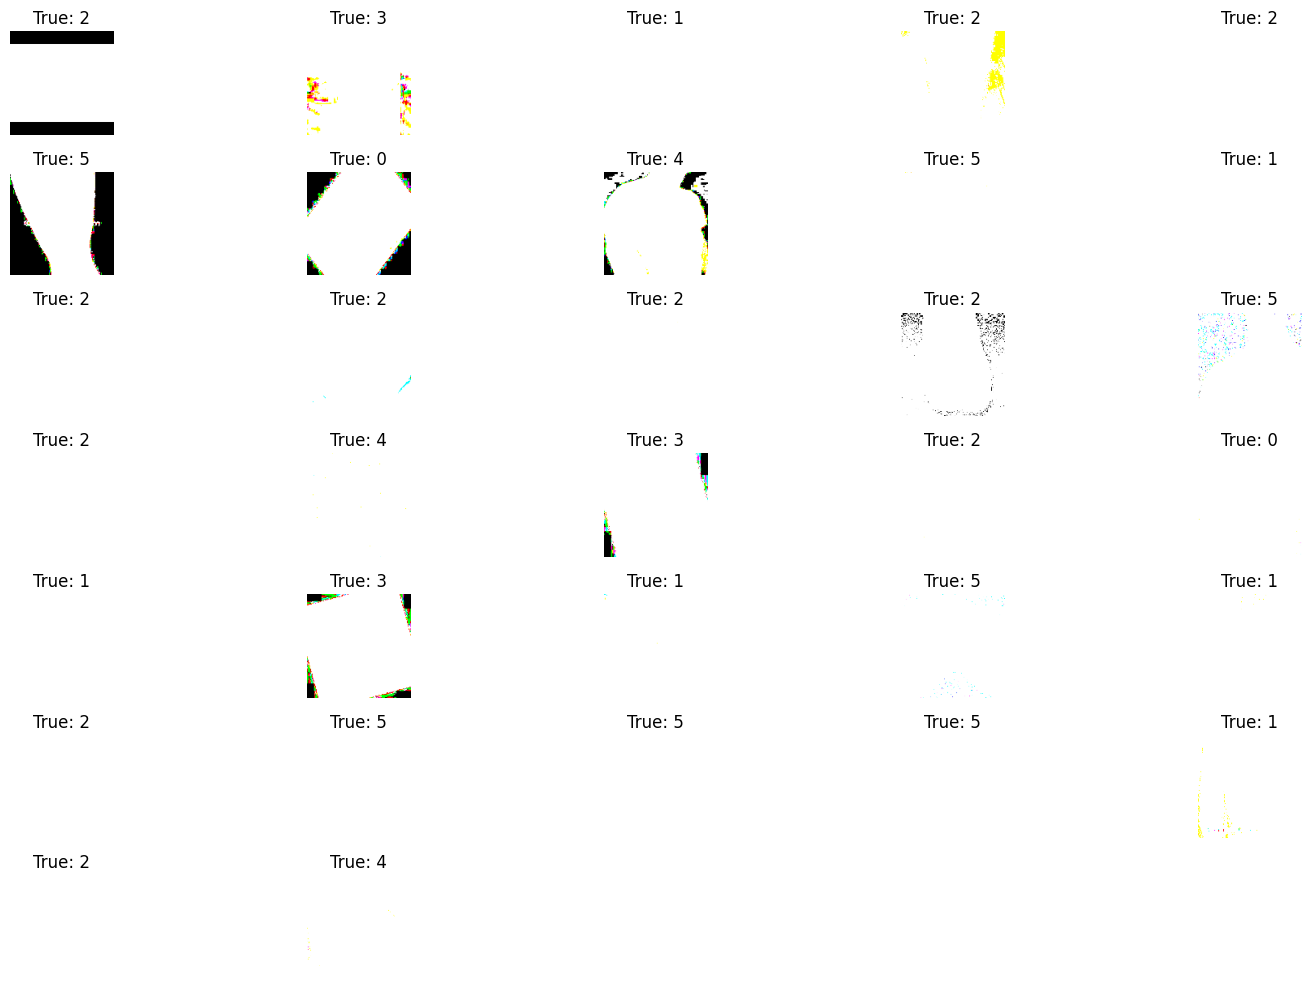

In [ ]:
#visualize data
import matplotlib.pyplot as plt

# Plotting function
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(15, 10))
    for i, (image, label) in enumerate(zip(images, labels)):
        plt.subplot(7, 5, i + 1)
        plt.imshow(image)
        plt.axis('off')
        if predictions is not None:
            title = f'True: {label}\nPred: {predictions[i]}'
        else:
            title = f'True: {label}'
        plt.title(title)
    plt.tight_layout()
    plt.show()

# Plotting a batch of training data
batch = next(iter(train_ds))
images, labels = batch
plot_images(images, labels)

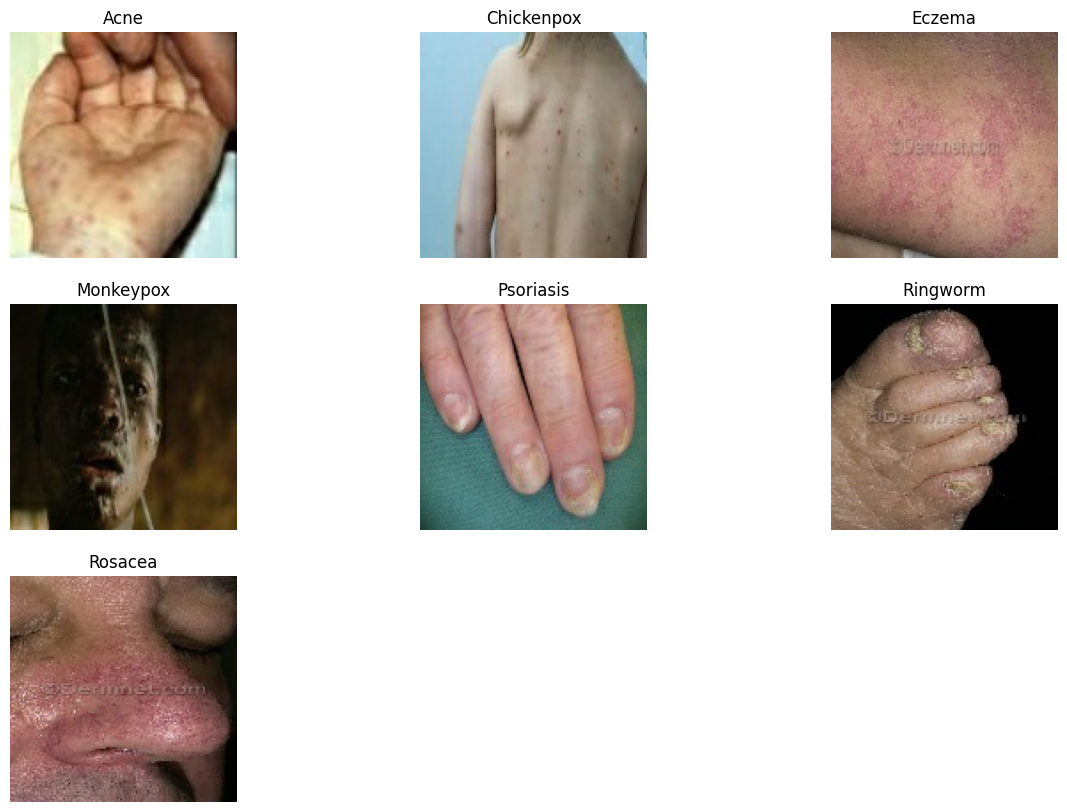

In [ ]:
### Visualizing the training data

plt.figure(figsize=(15, 10))

for i, class_ in enumerate(list(class_names)):
    plt.subplot(3, 3, i+1)
    data_path = os.path.join(str(data_dir_train), class_)
    # file_path = glob.glob(os.path.join(data_path,'*.jpg'))[0]
    file_path = glob.glob(os.path.join(data_path,'*.jpg'))
    if file_path:
      img = PIL.Image.open(file_path[0])
    # img = PIL.Image.open(file_path)
    plt.imshow(img)
    plt.title(class_)
    plt.axis("off")
plt.show()

In [ ]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 128, 128, 3)
(32,)


# Check the configuration of gpu and use gpu.

In [ ]:
# Allow gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


# data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
# Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

# Dataset.prefetch() overlaps data preprocessing and model execution while training.

#optimize the performance of a TensorFlow training dataset.  

## Compile the model

tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


tf.Tensor([6 1 1 2 2 3 1 1 6 4 2 1 1 2 5 5 2 0 5 3 5 2 1 0 5 3 2 1 2 2 4 1], shape=(32,), dtype=int32)


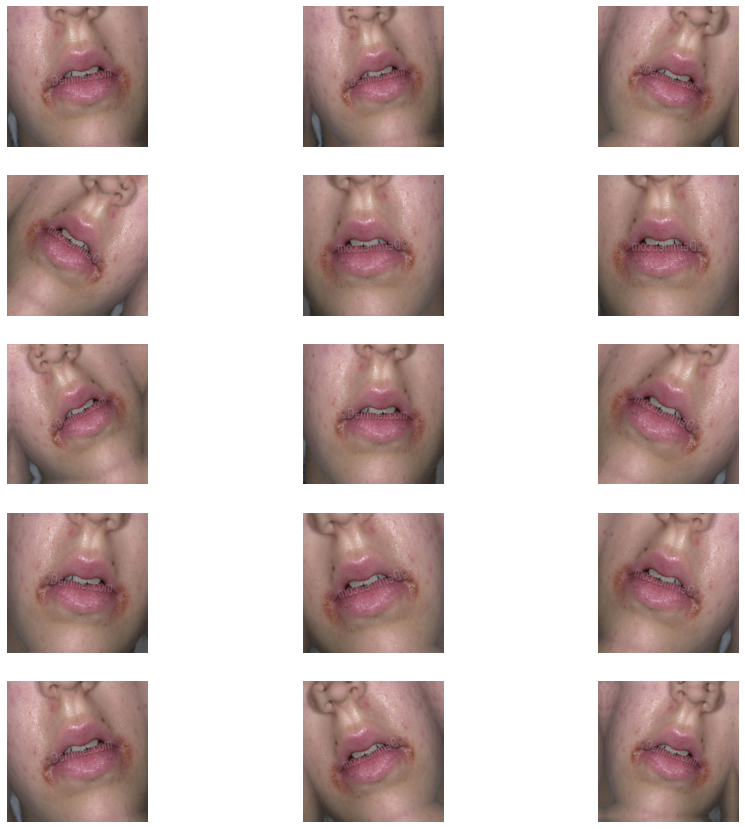

In [ ]:
plt.figure(figsize=(15, 15))
for images, label in train_ds.take(1):
    for i in range(15):
        print(label)      
        augmented_images = data_augmentation(images)
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        # plt.title(class_names[label[i]])
        plt.axis("off")

# Feature Extraction 

In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# IMAGE_SHAPE = (224, 224) orginal 
IMAGE_SHAPE = (128, 128)
BATCH_SIZE = 32
#creating Data Loaders for 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(data_dir_cus_aug_train,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(data_dir_cus_aug_test,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 11550 images belonging to 7 classes.
Testing images:
Found 2247 images belonging to 7 classes.


In [ ]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

mobilenet_url= "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

code from original site

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  

  return model

my code

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=True, # fine-tune the feature extraction layer
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    # layers.Conv2D(128, (3,3), activation='relu'),
    # layers.MaxPooling2D(4,4),
    # The third convolution
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # The fourth convolution
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # Flatten the results to feed into a DNN
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    # layers.Dropout(0.5), # add dropout regularization
    # layers.GlobalAveragePooling2D(input_shape=(7,7,512))
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='relu', name='output_layer', kernel_regularizer=tf.keras.regularizers.l2(0.001)) # create our own output layer with L2 regularization and relu activation      
  ])

  return model


In [ ]:
def create_model(model_url, num_classes=10):
 
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # fine-tune the feature extraction layer
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='relu', name='output_layer', kernel_regularizer=tf.keras.regularizers.l2(0.001)) # create our own output layer with L2 regularization and relu activation      
  ])

  return model

In [ ]:
#got 91.0
def create_model(model_url, num_classes=7):
    # Download the pretrained model and save it as a Keras layer
    feature_extractor_layer = hub.KerasLayer(model_url,
                                             trainable=False, # fine-tune the feature extraction layer
                                             name='feature_extraction_layer',
                                             input_shape=IMAGE_SHAPE+(3,)) # define the input image shape

    # Create our own model
    model = tf.keras.Sequential([
        feature_extractor_layer, # use the feature extraction layer as the base
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer with softmax activation      
    ])

    return model

## Code with multilayers 

### resnet

In [ ]:
#got loss: 0.0676 - accuracy: 0.9765 - val_loss: 1.4639 - val_accuracy: 0.8024
# Define the input shape
# input_shape = (224, 224, 3)

#this code defines a transfer learning model that uses a pre-trained ResNet model
#  to extract image features and a 
#  custom classification model to predict the class of the input image.

# define feature extraction model
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                             trainable=False, # fine-tune the feature extraction layer
                                             name='feature_extraction_layer',
                                             input_shape=IMAGE_SHAPE+(3,))

# Define the classification model
num_classes = 7
classification_model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax', name='output_layer')
])

# Add a layer to flatten the output from the feature extractor layer
flatten_layer = layers.Flatten(name='flatten_layer')

# Combine the models into a single model
model = tf.keras.Sequential([
    feature_extractor_layer,
    flatten_layer,
    classification_model
])

# Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### efficientnet model

In [ ]:
 

#this code defines a transfer learning model that uses a pre-trained efficientnet model
#  to extract image features and a 
#  custom classification model to predict the class of the input image.

# define feature extraction model
feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                             trainable=False, # fine-tune the feature extraction layer
                                             name='feature_extraction_layer',
                                             input_shape=IMAGE_SHAPE+(3,))

# Define the classification model
num_classes = 7
classification_model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax', name='output_layer')
])

# Add a layer to flatten the output from the feature extractor layer
flatten_layer = layers.Flatten(name='flatten_layer')
#With this change, the output from the feature extraction layer will be 
#flattened into a tensor of shape (None, flattened_size), where flattened_size is 
#the product of the spatial dimensions of the feature maps (i.e., flattened_size = None * None * 2048 in
                                                           #this case). 
#This flattened tensor can then be passed to the classification model for final prediction.

# Combine the models into a single model
model = tf.keras.Sequential([
    feature_extractor_layer,
    flatten_layer,
    classification_model
])


mobileNet 

In [ ]:
 
mobilenet_url= "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"
#this code defines a transfer learning model that uses a pre-trained efficientnet model
#  to extract image features and a 
#  custom classification model to predict the class of the input image.

# define feature extraction model
feature_extractor_layer = hub.KerasLayer(mobilenet_url,
                                             trainable=False, # fine-tune the feature extraction layer
                                             name='feature_extraction_layer',
                                             input_shape=IMAGE_SHAPE+(3,))

# Define the classification model
num_classes = 7
classification_model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax', name='output_layer')
])

# Add a layer to flatten the output from the feature extractor layer
flatten_layer = layers.Flatten(name='flatten_layer')
#With this change, the output from the feature extraction layer will be 
#flattened into a tensor of shape (None, flattened_size), where flattened_size is 
#the product of the spatial dimensions of the feature maps (i.e., flattened_size = None * None * 2048 in
                                                           #this case). 
#This flattened tensor can then be passed to the classification model for final prediction.

# Combine the models into a single model
model = tf.keras.Sequential([
    feature_extractor_layer,
    flatten_layer,
    classification_model
])


ValueError: ignored

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the MobileNetV2 model from TensorFlow Hub with input size (128, 128, 3)
# mobilenet_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_128/feature_vector/5"
feature_extractor_layer = hub.KerasLayer(mobilenet_url, input_shape=(128, 128, 3))

# Define the classification model
num_classes = 7
classification_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Combine the models into a single model
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Flatten(),
    classification_model
])

ValueError: ignored

mobilenet

In [ ]:
# Load the feature extraction module
feature_extractor_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_128/feature_vector/5", input_shape=(128, 128, 3))

# Freeze the pre-trained model weights
feature_extractor_layer.trainable = False

# Create a new model
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
train_ds = image_dataset_from_directory(data_dir_cus_aug_train, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')
valid_ds = image_dataset_from_directory(data_dir_cus_aug_train, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='validation')

Found 11550 files belonging to 7 classes.
Using 9240 files for training.
Found 11550 files belonging to 7 classes.
Using 2310 files for validation.


In [ ]:
# # Compile code from resnet model 
# resnet_model.compile(loss='categorical_crossentropy',
#                      optimizer=tf.keras.optimizers.Adam(),
#                      metrics=['accuracy'])

# #compilation code from classification model
# model.compile(optimizer='adam',
#               loss=SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 flatten_layer (Flatten)     (None, 2048)              0         
                                                                 
 sequential (Sequential)     (None, 7)                 270983    
                                                                 
Total params: 23,835,783
Trainable params: 270,983
Non-trainable params: 23,564,800
_________________________________________________________________


### resnet 

In [ ]:
# #fit model code from resnet 
# resnet_history = resnet_model.fit(train_data,
#                                   epochs=10,
#                                   steps_per_epoch=len(train_data),
#                                   validation_data=test_data,
#                                   validation_steps=len(test_data),
#                                   # Add TensorBoard callback to model (callbacks parameter takes a list)
#                                   callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
#                                                                          experiment_name="resnet50V2")]) # name of log files

# #fit the model from mobilenet code 
# epochs = 30

# history = model.fit(
#   train_ds,
#   validation_data=valid_ds,
#   epochs=epochs
# )

epochs = 20

history = model.fit(
  train_data,
  steps_per_epoch=len(train_data),
  validation_data=test_data,
  validation_steps=len(test_data),
  epochs=epochs,
  # Add TensorBoard callback to model (callbacks parameter takes a list)
  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                          experiment_name="telederm")] # name of log files
)

Saving TensorBoard log files to: tensorflow_hub/telederm/20230408-070522
Epoch 1/20
260/260 [==============================] - 2957s 11s/step - loss: 1.4310 - accuracy: 0.4678 - val_loss: 0.9765 - val_accuracy: 0.6318
Epoch 2/20
260/260 [==============================] - 40s 155ms/step - loss: 1.0377 - accuracy: 0.6116 - val_loss: 0.8479 - val_accuracy: 0.6832
Epoch 3/20
260/260 [==============================] - 34s 130ms/step - loss: 0.8597 - accuracy: 0.6820 - val_loss: 0.7997 - val_accuracy: 0.7132
Epoch 4/20
260/260 [==============================] - 34s 131ms/step - loss: 0.7428 - accuracy: 0.7236 - val_loss: 0.7424 - val_accuracy: 0.7318
Epoch 5/20
260/260 [==============================] - 41s 156ms/step - loss: 0.6376 - accuracy: 0.7619 - val_loss: 0.7970 - val_accuracy: 0.7126
Epoch 6/20
260/260 [==============================] - 34s 132ms/step - loss: 0.5537 - accuracy: 0.7942 - val_loss: 0.8174 - val_accuracy: 0.7165
Epoch 7/20
260/260 [==============================] - 34s

with balanced classes

In [ ]:
#got 0.0751 - accuracy: 0.9751 - val_loss: 1.9518 - val_accuracy: 0.7236
epochs = 20

history = model.fit(
  train_data,
  steps_per_epoch=len(train_data),
  validation_data=test_data,
  validation_steps=len(test_data),
  epochs=epochs,
  # Add TensorBoard callback to model (callbacks parameter takes a list)
  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                          experiment_name="telederm")] # name of log files
)

Saving TensorBoard log files to: tensorflow_hub/telederm/20230408-175658
Epoch 1/20
361/361 [==============================] - 3575s 10s/step - loss: 1.3295 - accuracy: 0.4981 - val_loss: 0.9753 - val_accuracy: 0.6573
Epoch 2/20
361/361 [==============================] - 697s 2s/step - loss: 0.9143 - accuracy: 0.6595 - val_loss: 0.9391 - val_accuracy: 0.6805
Epoch 3/20
361/361 [==============================] - 698s 2s/step - loss: 0.7221 - accuracy: 0.7286 - val_loss: 1.0784 - val_accuracy: 0.6765
Epoch 4/20
361/361 [==============================] - 670s 2s/step - loss: 0.6041 - accuracy: 0.7733 - val_loss: 0.9499 - val_accuracy: 0.7081
Epoch 5/20
361/361 [==============================] - 703s 2s/step - loss: 0.4830 - accuracy: 0.8181 - val_loss: 0.9199 - val_accuracy: 0.7285
Epoch 6/20
361/361 [==============================] - 701s 2s/step - loss: 0.4123 - accuracy: 0.8489 - val_loss: 1.0144 - val_accuracy: 0.7170
Epoch 7/20
361/361 [==============================] - 700s 2s/step 

### efficientnet_url

In [ ]:
#fit with efficientnet_url
epochs = 20

history = model.fit(
  train_data,
  steps_per_epoch=len(train_data),
  validation_data=test_data,
  validation_steps=len(test_data),
  epochs=epochs,
  # Add TensorBoard callback to model (callbacks parameter takes a list)
  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                          experiment_name="telederm")] # name of log files
)

Saving TensorBoard log files to: tensorflow_hub/telederm/20230408-091151
Epoch 1/20
260/260 [==============================] - 58s 146ms/step - loss: 1.2016 - accuracy: 0.5363 - val_loss: 0.7905 - val_accuracy: 0.7228
Epoch 2/20
260/260 [==============================] - 34s 131ms/step - loss: 0.8021 - accuracy: 0.7119 - val_loss: 0.8131 - val_accuracy: 0.7098
Epoch 3/20
260/260 [==============================] - 41s 157ms/step - loss: 0.6411 - accuracy: 0.7774 - val_loss: 0.7257 - val_accuracy: 0.7499
Epoch 4/20
260/260 [==============================] - 33s 128ms/step - loss: 0.5276 - accuracy: 0.8174 - val_loss: 0.7267 - val_accuracy: 0.7555
Epoch 5/20
260/260 [==============================] - 34s 130ms/step - loss: 0.4339 - accuracy: 0.8485 - val_loss: 0.7920 - val_accuracy: 0.7516
Epoch 6/20
260/260 [==============================] - 41s 156ms/step - loss: 0.3579 - accuracy: 0.8782 - val_loss: 0.7641 - val_accuracy: 0.7589
Epoch 7/20
260/260 [==============================] - 40s

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

# Generate some random data for testing
x_train = np.random.rand(100, 128, 128, 3)
y_train = np.random.randint(2, size=(100, 1))

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 3s 165ms/step - loss: 0.7606 - accuracy: 0.5200
Epoch 2/5
4/4 [==============================] - 0s 22ms/step - loss: 0.6960 - accuracy: 0.4800
Epoch 3/5
4/4 [==============================] - 0s 16ms/step - loss: 0.6952 - accuracy: 0.5600
Epoch 4/5
4/4 [==============================] - 0s 15ms/step - loss: 0.6920 - accuracy: 0.5600
Epoch 5/5
4/4 [==============================] - 0s 15ms/step - loss: 0.6981 - accuracy: 0.5200


In [ ]:
#fit with mobile net 
epochs = 20

history = model.fit(
  train_data,
  steps_per_epoch=len(train_data),
  validation_data=test_data,
  validation_steps=len(test_data),
  epochs=epochs,
  # Add TensorBoard callback to model (callbacks parameter takes a list)
  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                          experiment_name="telederm")] # name of log files
)

Saving TensorBoard log files to: tensorflow_hub/telederm/20230408-094620
Epoch 1/20
260/260 [==============================] - 44s 168ms/step - loss: 0.4296 - accuracy: 0.8569 - val_loss: 0.4272 - val_accuracy: 0.8571
Epoch 2/20
260/260 [==============================] - 40s 154ms/step - loss: 0.4201 - accuracy: 0.8571 - val_loss: 0.4210 - val_accuracy: 0.8571
Epoch 3/20
260/260 [==============================] - 33s 125ms/step - loss: 0.4163 - accuracy: 0.8571 - val_loss: 0.4179 - val_accuracy: 0.8571
Epoch 4/20
260/260 [==============================] - 40s 155ms/step - loss: 0.4145 - accuracy: 0.8571 - val_loss: 0.4155 - val_accuracy: 0.8571
Epoch 5/20
260/260 [==============================] - 33s 126ms/step - loss: 0.4134 - accuracy: 0.8571 - val_loss: 0.4146 - val_accuracy: 0.8571
Epoch 6/20
260/260 [==============================] - 33s 128ms/step - loss: 0.4126 - accuracy: 0.8571 - val_loss: 0.4141 - val_accuracy: 0.8571
Epoch 7/20
260/260 [==============================] - 33s

In [ ]:
#save model
model.save('/content/drive/MyDrive/FYP_DATASET/TeleDerm/Model/telederm9772withbalancedClasses.h5')

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/FYP_DATASET/TeleDerm/Model/telederm9772withbalancedClasses.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.applications import MobileNetV2

input_shape=(128,128,3)
n_classes=7
def depth_block(x, strides):
    x = DepthwiseConv2D(3,strides=strides,padding='same',  use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
def single_conv_block(x,filters):
    x = Conv2D(filters, 1,use_bias=False)(x)
    x= BatchNormalization()(x)
    x = ReLU()(x)
    return x
def combo_layer(x,filters,strides):
    x = depth_block(x,strides)
    x = single_conv_block(x, filters)
    return x

def create_model(model_url, num_classes=10):

  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  model = Sequential()
  model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128, 128, 3)))
  x = Conv2D(32,3,strides=(2,2),padding = 'same', use_bias=False) (model.output)
  x =  BatchNormalization()(x)
  x = ReLU()(x)
  x = combo_layer(x,64, strides=(1,1))
  x = combo_layer(x,128,strides=(2,2))
  x = combo_layer(x,128,strides=(1,1))
  x = combo_layer(x,256,strides=(2,2))
  x = combo_layer(x,256,strides=(1,1))
  x = combo_layer(x,512,strides=(2,2))
  for _ in range(5):
      x = combo_layer(x,512,strides=(1,1))
  x = combo_layer(x,1024,strides=(2,2))
  x = combo_layer(x,1024,strides=(1,1))
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.25)(x)
  x = Dense(128)(x)
  output = Dense(n_classes,activation='softmax')(x)
  model = Model(model.input, output)

    # optimizer = Adam(lr=0.001)


  return model



In [ ]:
train_ds = image_dataset_from_directory(data_dir_train, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')
valid_ds = image_dataset_from_directory(data_dir_train, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='validation')

Found 8303 files belonging to 7 classes.
Using 6643 files for training.
Found 8303 files belonging to 7 classes.
Using 1660 files for validation.


In [ ]:
# Create model
num_classes = len(train_ds.class_names)  
# resnet_model = create_model(resnet_url, num_classes=class_names)
resnet_model = create_model(resnet_url, num_classes=num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=10,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20230323-163406
Epoch 1/10
260/260 [==============================] - 2643s 10s/step - loss: 1.2453 - accuracy: 0.5188 - val_loss: 0.7899 - val_accuracy: 0.6804
Epoch 2/10
260/260 [==============================] - 1772s 7s/step - loss: 0.8821 - accuracy: 0.6599 - val_loss: 0.6602 - val_accuracy: 0.7470
Epoch 3/10
260/260 [==============================] - 1770s 7s/step - loss: 0.7265 - accuracy: 0.7185 - val_loss: 0.6540 - val_accuracy: 0.7612
Epoch 4/10
260/260 [==============================] - 1770s 7s/step - loss: 0.6245 - accuracy: 0.7682 - val_loss: 0.6107 - val_accuracy: 0.7849
Epoch 5/10
260/260 [==============================] - 1782s 7s/step - loss: 0.5298 - accuracy: 0.8025 - val_loss: 0.6325 - val_accuracy: 0.7871
Epoch 6/10
260/260 [==============================] - 1788s 7s/step - loss: 0.4590 - accuracy: 0.8348 - val_loss: 0.6372 - val_accuracy: 0.7883
Epoch 7/10
260/260 [==============================] - 1772s 

In [ ]:
#save model
resnet_model.save('/content/drive/MyDrive/FYP_DATASET/TeleDerm/Model/teledermwithResnet9180.h5')

### Download the saved model file to your local machine

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/teledermwithResnet9180.h5')

FileNotFoundError: ignored

In [ ]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

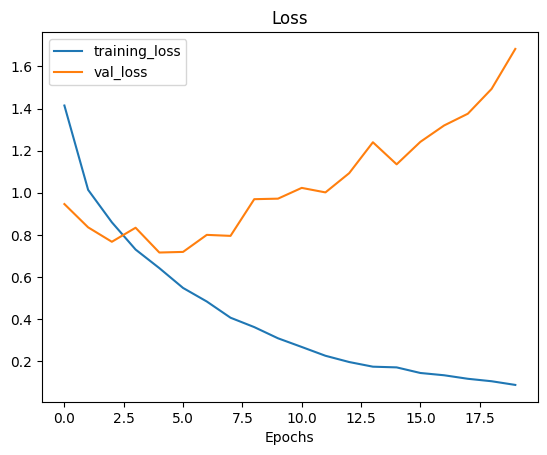

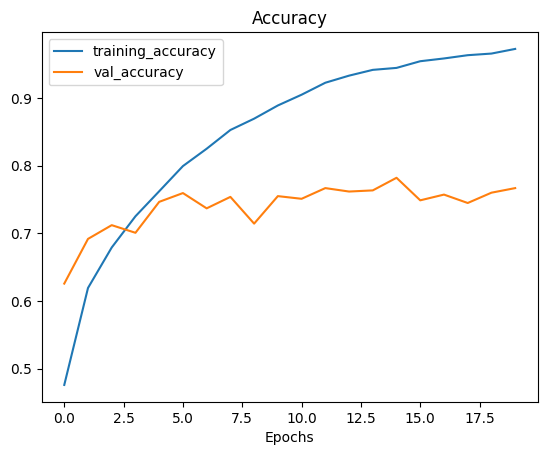

In [ ]:
plot_loss_curves(history)

In [ ]:
# Resnet summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 sequential (Sequential)     (None, 7)                 270983    
                                                                 
Total params: 23,835,783
Trainable params: 270,983
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
test_score=resnet_model.evaluate(test_dataset)

NameError: ignored

# Classification 

## Create the model, compile and train the model

In [ ]:
def depth_block(x, strides):
    x = DepthwiseConv2D(3,strides=strides,padding='same',  use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
def single_conv_block(x,filters):
    x = Conv2D(filters, 1,use_bias=False)(x)
    x= BatchNormalization()(x)
    x = ReLU()(x)
    return x
def combo_layer(x,filters,strides):
    x = depth_block(x,strides)
    x = single_conv_block(x, filters)
    return x
def MobileNet(input_shape=(128,128,3),n_classes = 9,inbuilt_aug=True):
    if inbuilt_aug:
        model = data_augmentation
    model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128, 128, 3)))
    x = Conv2D(32,3,strides=(2,2),padding = 'same', use_bias=False) (model.output)
    x =  BatchNormalization()(x)
    x = ReLU()(x)
    x = combo_layer(x,64, strides=(1,1))
    x = combo_layer(x,128,strides=(2,2))
    x = combo_layer(x,128,strides=(1,1))
    x = combo_layer(x,256,strides=(2,2))
    x = combo_layer(x,256,strides=(1,1))
    x = combo_layer(x,512,strides=(2,2))
    for _ in range(5):
        x = combo_layer(x,512,strides=(1,1))
    x = combo_layer(x,1024,strides=(2,2))
    x = combo_layer(x,1024,strides=(1,1))
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.25)(x)
    x = Dense(128)(x)
    output = Dense(n_classes,activation='softmax')(x)
    model = Model(model.input, output)
    return model

my code

In [ ]:
#created my own code 
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def MobileNet(input_shape=(128,128,3), n_classes=9):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False
    
    # model = Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(n_classes, activation='softmax'))

    optimizer = Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     validation_split=0.2
# )

# train_generator = train_datagen.flow_from_directory(
#     'train/',
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training'
# )

# validation_generator = train_datagen.flow_from_directory(
#     'train/',
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation'
# )

# model = MobileNet()
# history = model.fit(
#     train_generator,
#     epochs=50,
#     validation_data=validation_generator
# )

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 128)     

In [ ]:
model = MobileNet()
model.summary()

NameError: ignored

In [ ]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Define the input shape
input_shape = (224, 224, 3)

# Load the feature extraction model
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url, input_shape=input_shape, trainable=False)

# Define the classification model
num_classes = 10
classification_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Combine the models into a single model
model = tf.keras.Sequential([
    feature_extractor_layer,
    classification_model
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Training the model

In [ ]:
epochs = 30

history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/30


ValueError: ignored

In [ ]:
#https://www.youtube.com/watch?v=O1cDsGzaFEE 
# model.save(telederm_pred.h5)

#save model
resnet_model.save('/content/drive/MyDrive/FYP_DATASET/TeleDerm/teledermWithMobileNet.h5')

NameError: ignored

In [ ]:
from keras.models import load_model 
model = load_model("content/telederm_pred.h5")

# Visualizing the results

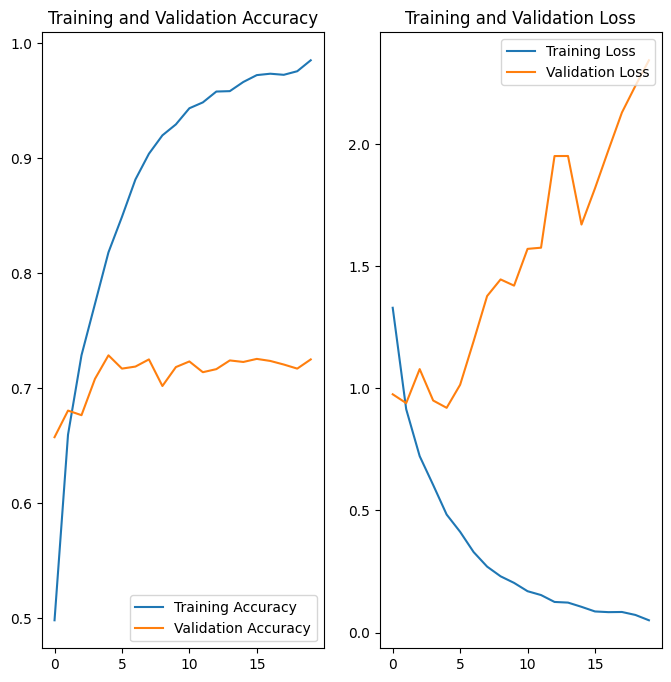

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
class_size = {}

for name in class_names:
    class_size[name] = len(list(data_dir_cus_aug_train.glob(name+'/*.jpg')))

class_size

{'Acne': 1650,
 'Chickenpox': 1650,
 'Eczema': 1650,
 'Monkeypox': 1650,
 'Psoriasis': 1650,
 'Ringworm': 1650,
 'Rosacea': 1650}

In [ ]:
class_df = pd.DataFrame(class_size.items(),index=list(class_size), columns = ['ClassName', 'NumberOfSamples'])
class_df.drop(['ClassName'], axis = 1, inplace=True)
class_df

NumberOfSamples
Acne                   1650
Chickenpox             1650
Eczema                 1650
Monkeypox              1650
Psoriasis              1650
Ringworm               1650
Rosacea                1650

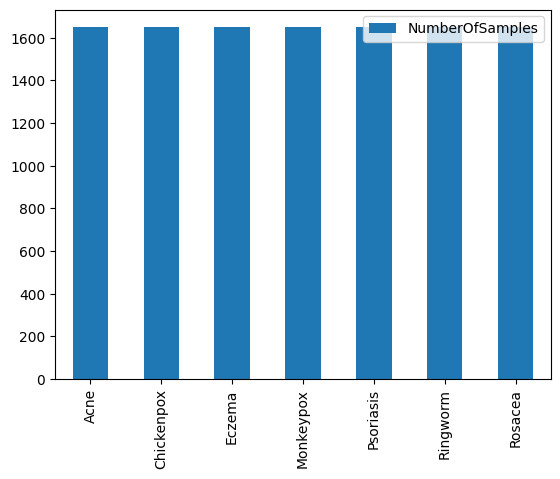

In [ ]:
class_df.plot.bar()
plt.show()

# Model evaluation

In [ ]:
#mobileNet model
test_dataset = image_dataset_from_directory(data_dir_cus_aug_test, image_size=(img_height, img_width), 
                                           batch_size=118)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 2247 files belonging to 7 classes.


In [ ]:
#Resnet model
test_dataset = image_dataset_from_directory(data_dir_test, image_size=(224, 224), 
                                           batch_size=118)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 1771 files belonging to 7 classes.


In [ ]:
#mobilenet model
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

In [ ]:
 #resnet model
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = resnet_model.predict_on_batch(image_batch)

NameError: ignored

In [ ]:
actual = tf.keras.utils.to_categorical(
    label_batch, num_classes=7, dtype='int32'
)

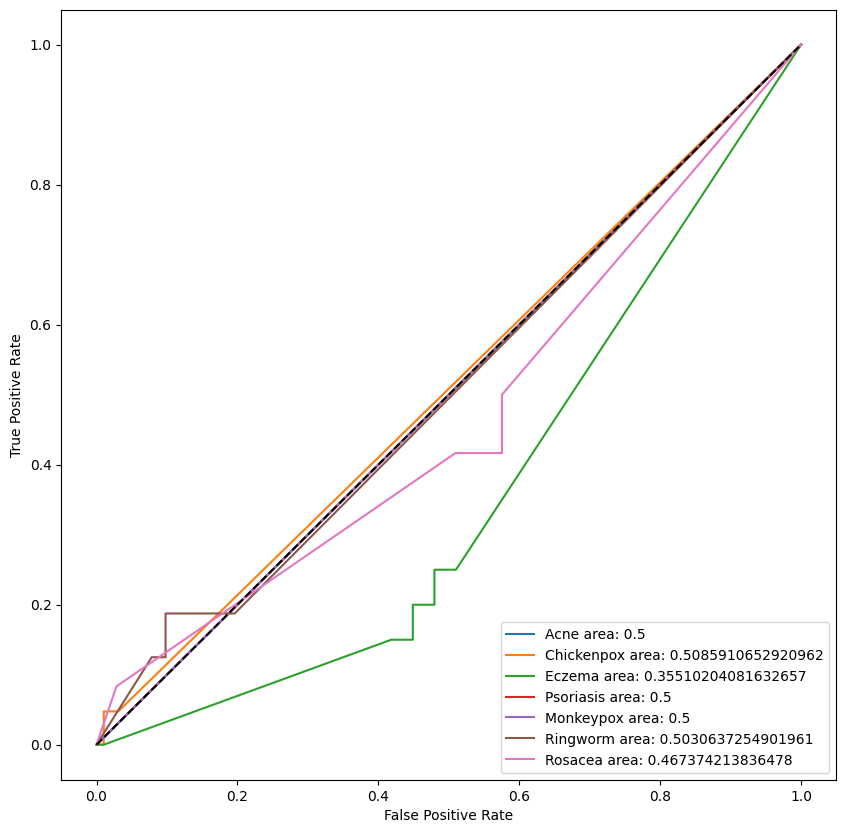

In [ ]:
fpr0, tpr0, _ = metrics.roc_curve(actual[:,0],  predictions[:,0])
fpr1, tpr1, _ = metrics.roc_curve(actual[:,1],  predictions[:,1])
fpr2, tpr2, _ = metrics.roc_curve(actual[:,2],  predictions[:,2])
fpr3, tpr3, _ = metrics.roc_curve(actual[:,3],  predictions[:,3])
fpr4, tpr4, _ = metrics.roc_curve(actual[:,4],  predictions[:,4])
fpr5, tpr5, _ = metrics.roc_curve(actual[:,5],  predictions[:,5])
fpr6, tpr6, _ = metrics.roc_curve(actual[:,6],  predictions[:,6])

auc0 = metrics.roc_auc_score(actual[:,0],  predictions[:,0])
auc1 = metrics.roc_auc_score(actual[:,1],  predictions[:,1])
auc2 = metrics.roc_auc_score(actual[:,2],  predictions[:,2])
auc3 = metrics.roc_auc_score(actual[:,3],  predictions[:,3])
auc4 = metrics.roc_auc_score(actual[:,4],  predictions[:,4])
auc5 = metrics.roc_auc_score(actual[:,5],  predictions[:,5])
auc6 = metrics.roc_auc_score(actual[:,6],  predictions[:,6])


fpr100 = tpr100 = np.array(range( 0,11))/10

plt.figure(figsize=(10,10))
plt.plot(fpr0,tpr0, label = "Acne area: " + str(auc0))
plt.plot(fpr1,tpr1, label = "Chickenpox area: " + str(auc1))
plt.plot(fpr2,tpr2, label = "Eczema area: " + str(auc2))
plt.plot(fpr3,tpr3, label = "Psoriasis area: " + str(auc3))
plt.plot(fpr4,tpr4, label = "Monkeypox area: " + str(auc4))
plt.plot(fpr5,tpr5, label = "Ringworm area: " + str(auc5))
plt.plot(fpr6,tpr6, label = "Rosacea area: " + str(auc6))


plt.plot(fpr100,tpr100,'--',color = "black")
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ddd.jpg", bbox_inches = "tight")
plt.show()

In [ ]:
#mobile net model
test_score=model.evaluate(test_dataset)

ValueError: ignored

In [ ]:
test_score=resnet_model.evaluate(test_dataset)

NameError: ignored

## Prediction 

In [ ]:
img_path = '/content/drive/MyDrive/FYP_DATASET/TeleDerm/Test/Acne/001.jpg'
# plt.imshow(img)
# plt.show()

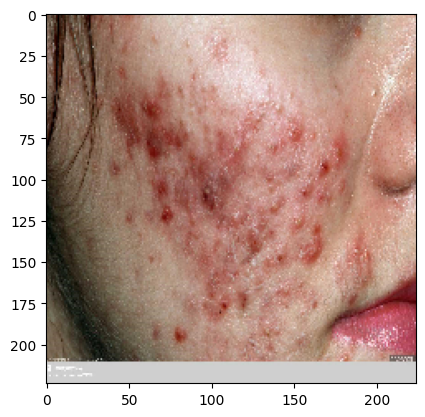

ValueError: ignored

In [ ]:
import numpy as np
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

# Load the image
img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.show()

# Convert the image to a numpy array
x = image.img_to_array(img)

# Reshape the array to match the expected input shape of your model
x = np.expand_dims(x, axis=0)

# Normalize the pixel values
x = x / 255.0

# Use the model to predict the class probabilities
preds = model.predict(x)

# Print the predicted class probabilities
print(preds)

# Get the index of the highest probability
pred_index = np.argmax(preds, axis=1)[0]

# Get the corresponding class name from the list
pred_class = class_names[pred_index]

# Print the predicted class name
print(pred_class)

In [ ]:
import numpy as np

# Make predictions on test data
predictions = model.predict(test_data)

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Get actual labels
true_labels = test_data.classes

# Get confidence scores
confidence_scores = np.max(predictions, axis=1)

# Print predicted label, actual label, and confidence score for each prediction
for i in range(len(predicted_labels)):
    print(f"Prediction: {predicted_labels[i]}, Actual Label: {true_labels[i]}, Confidence Score: {confidence_scores[i]}")

71/71 [==============================] - 115s 2s/step
Prediction: 4, Actual Label: 0, Confidence Score: 0.9999999403953552
Prediction: 4, Actual Label: 0, Confidence Score: 0.5954410433769226
Prediction: 6, Actual Label: 0, Confidence Score: 0.9617902040481567
Prediction: 2, Actual Label: 0, Confidence Score: 0.9999992251396179
Prediction: 0, Actual Label: 0, Confidence Score: 0.9999999403953552
Prediction: 3, Actual Label: 0, Confidence Score: 0.9999977946281433
Prediction: 5, Actual Label: 0, Confidence Score: 0.9958043694496155
Prediction: 0, Actual Label: 0, Confidence Score: 0.9922822117805481
Prediction: 0, Actual Label: 0, Confidence Score: 0.9999895691871643
Prediction: 0, Actual Label: 0, Confidence Score: 0.9969081878662109
Prediction: 6, Actual Label: 0, Confidence Score: 0.9925917387008667
Prediction: 6, Actual Label: 0, Confidence Score: 0.5802757143974304
Prediction: 6, Actual Label: 0, Confidence Score: 0.9999988675117493
Prediction: 0, Actual Label: 0, Confidence Score:

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Predict class probabilities for each sample in the validation set
validation_probs = model.predict(valid_ds)


# Compute the anomaly score for each sample using the Isolation Forest algorithm
isof = IsolationForest()
isof.fit(validation_probs)
anomaly_scores = -isof.score_samples(validation_probs)

# Set a threshold for the anomaly score
threshold = np.percentile(anomaly_scores, 95)

# Classify each sample in the validation set as either a known class or an "unknown" or "out of distribution" sample
for i, score in enumerate(anomaly_scores):
    if score < threshold:
        # Sample belongs to one of the known classes
        class_idx = np.argmax(validation_probs[i])
        class_label = class_names[class_idx]
        print(f"Sample {i} belongs to class {class_label}")
    else:
        # Sample is an "unknown" or "out of distribution" sample
        print(f"Sample {i} is an 'unknown' or 'out of distribution' sample")

52/52 [==============================] - 5s 70ms/step
Sample 0 belongs to class Chickenpox
Sample 1 belongs to class Chickenpox
Sample 2 belongs to class Chickenpox
Sample 3 belongs to class Chickenpox
Sample 4 belongs to class Chickenpox
Sample 5 belongs to class Chickenpox
Sample 6 belongs to class Chickenpox
Sample 7 belongs to class Chickenpox
Sample 8 belongs to class Chickenpox
Sample 9 belongs to class Chickenpox
Sample 10 belongs to class Chickenpox
Sample 11 belongs to class Chickenpox
Sample 12 belongs to class Chickenpox
Sample 13 belongs to class Chickenpox
Sample 14 belongs to class Chickenpox
Sample 15 belongs to class Chickenpox
Sample 16 is an 'unknown' or 'out of distribution' sample
Sample 17 belongs to class Chickenpox
Sample 18 belongs to class Chickenpox
Sample 19 is an 'unknown' or 'out of distribution' sample
Sample 20 belongs to class Chickenpox
Sample 21 belongs to class Chickenpox
Sample 22 belongs to class Chickenpox
Sample 23 is an 'unknown' or 'out of distr

1/1 [==============================] - 0s 84ms/step


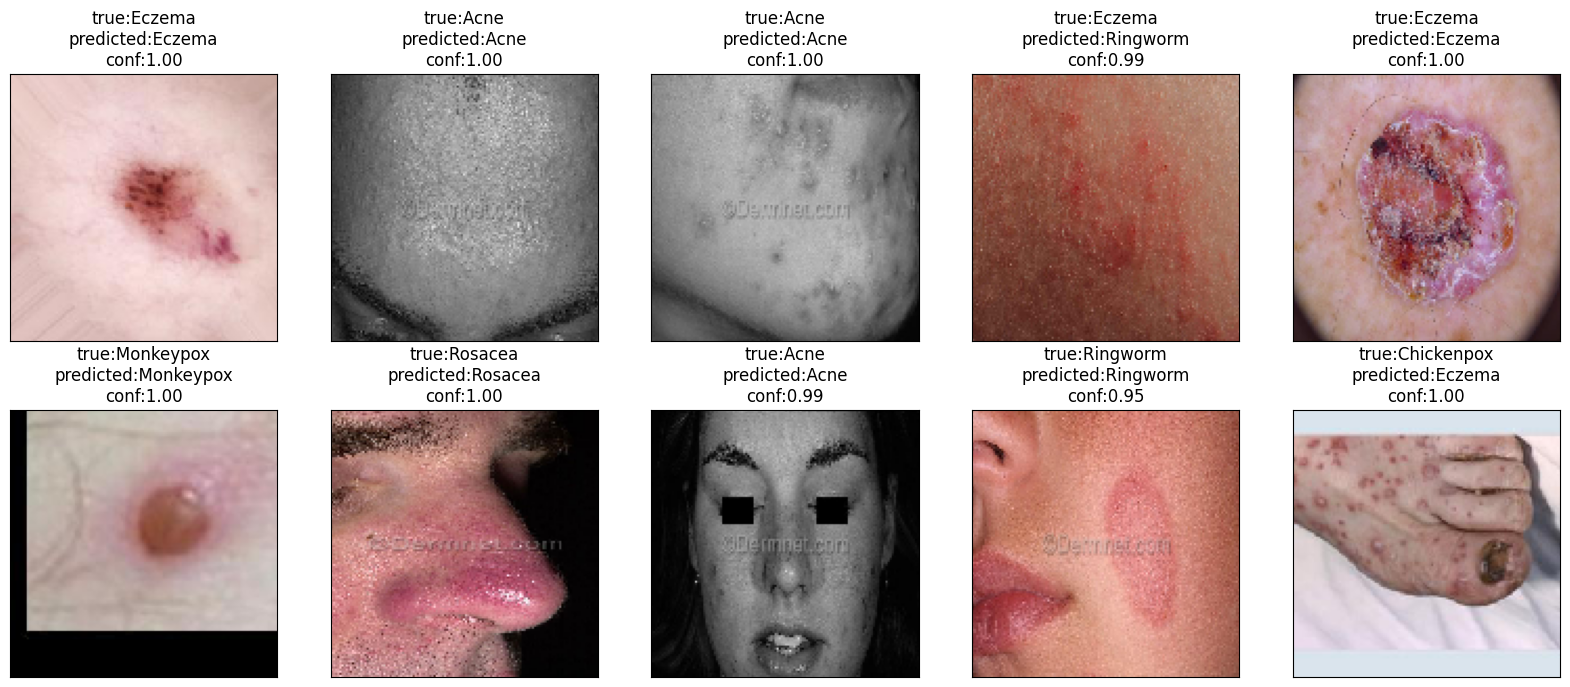

In [ ]:
import matplotlib.pyplot as plt

# get predictions
pred_labels = model.predict(test_data)
predicted_classes = np.argmax(pred_labels, axis=1)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

# plot images with labels and predictions
figure = plt.figure(figsize=(20, 8))
# for i, index in enumerate(test_data.index_array[:10]):
#     ax = figure.add_subplot(2, 5, i+1, xticks=[], yticks=[])
#     ax.imshow(test_data[index][0])
#     predicted_class = class_labels[predicted_classes[index]]
#     true_class = class_labels[true_classes[index]]
#     confidence = pred_labels[index][predicted_classes[index]]
#     ax.set_title(f"true: {true_class}\npredicted: {predicted_class}\nconfidence: {confidence:.2f}")

for i, index in enumerate(range(10)):
    ax = figure.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    batch = test_data.next()
    image = batch[0][i]
    true_class = class_labels[np.argmax(batch[1][i])]
    predicted_class = class_labels[np.argmax(model.predict(np.expand_dims(image, axis=0)))]
    confidence = np.max(model.predict(np.expand_dims(image, axis=0)))
    ax.set_title(f"true:{true_class}\npredicted:{predicted_class}\nconf:{confidence:.2f}")
    ax.imshow(image)    
    
plt.show()

# Evaluation 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the true labels
y_true = test_data.labels

# Use the model to predict the labels
y_pred = np.argmax(model.predict(test_data), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(cm)

71/71 [==============================] - 115s 2s/step
[[37 41 45 43 35 34 55]
 [39 52 56 50 41 28 64]
 [50 57 76 71 40 46 67]
 [33 38 63 55 31 35 75]
 [48 38 51 54 40 32 67]
 [37 42 55 39 41 40 56]
 [26 39 49 43 21 19 53]]


71/71 [==============================] - 115s 2s/step


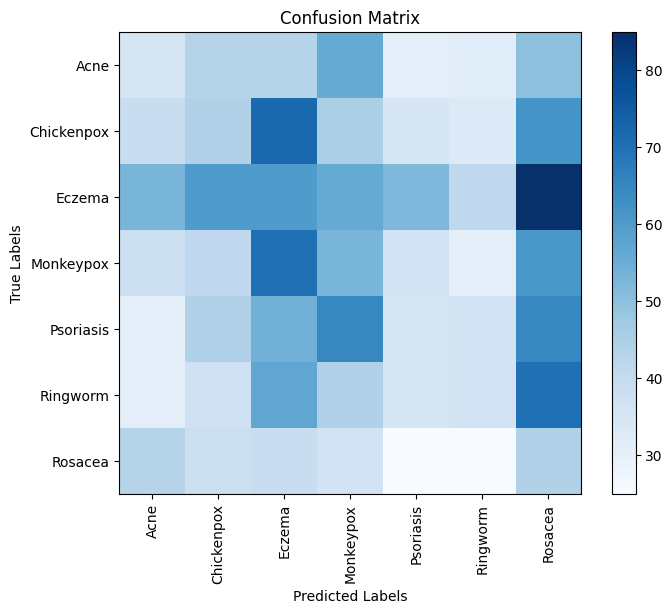

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels
true_labels = test_data.classes
predicted_labels = np.argmax(model.predict(test_data), axis=-1)

# Get the class names
class_names = train_data.class_indices.keys()

# Compute the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
y_pred = np.argmax(model.predict(test_data), axis=-1)
y_true = test_data.classes

# Calculate metrics
accuracy = np.mean(y_pred == y_true)
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_names)

# Print metrics
print("Accuracy:", accuracy)
print("Confusion matrix:")
print(cm)
print("Classification report:")
print(report)

71/71 [==============================] - 114s 2s/step
Accuracy: 0.157543391188251
Confusion matrix:
[[29 30 58 43 34 29 67]
 [52 60 56 47 40 26 49]
 [43 65 74 63 47 48 67]
 [45 42 53 60 36 31 63]
 [36 37 59 49 39 34 76]
 [34 36 54 50 37 38 61]
 [31 37 41 43 16 28 54]]
Classification report:
              precision    recall  f1-score   support

        Acne       0.11      0.10      0.10       290
  Chickenpox       0.20      0.18      0.19       330
      Eczema       0.19      0.18      0.18       407
   Monkeypox       0.17      0.18      0.18       330
   Psoriasis       0.16      0.12      0.13       330
    Ringworm       0.16      0.12      0.14       310
     Rosacea       0.12      0.22      0.16       250

    accuracy                           0.16      2247
   macro avg       0.16      0.16      0.15      2247
weighted avg       0.16      0.16      0.16      2247



In [ ]:
from sklearn.metrics import roc_curve, auc

# Use the model to make predictions on the test set
y_pred = model.predict(test_data)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(test_data.classes == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_data.one_hot_labels.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(class_labels[i], roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


56/56 [==============================] - 15s 276ms/step


NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the test set
def get_true_and_predicted(model, test_data):
    y_true = test_data.classes
    y_pred_prob = model.predict(test_data)
    y_pred = np.argmax(y_pred_prob, axis=1)
    return y_true, y_pred, y_pred_prob
# y_pred = model.predict(test_data)
y_true, y_pred, y_pred_prob = get_true_and_predicted(model, test_data)

# Compute ROC curve and ROC area for each class
n_classes = len(test_data.class_indices)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr["micro"], tpr["micro"], _ = roc_curve(keras.utils.to_categorical(y_true).ravel(), y_pred_prob.ravel())


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_data.classes.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Add labels and legend
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


56/56 [==============================] - 14s 250ms/step


ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels and predicted probabilities for the test set
def get_true_and_predicted(model, test_data):
    y_true = test_data.classes
    y_pred_prob = model.predict(test_data)
    return y_true, y_pred_prob

# Get the ROC curve and ROC area for each class
def get_roc_curve(y_true, y_pred_prob, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(
        keras.utils.to_categorical(y_true, n_classes).ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return fpr, tpr, roc_auc

# Get the true labels and predicted probabilities
y_true, y_pred_prob = get_true_and_predicted(model, test_data)
n_classes = len(test_data.class_indices)

# Compute the ROC curve and ROC area for each class
fpr, tpr, roc_auc = get_roc_curve(y_true, y_pred_prob, n_classes)

# Plot the ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple','yellow','brown']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Add labels and legend
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


25/71 [=========>....................] - ETA: 1:15

KeyboardInterrupt: ignored

Peak Signal-to-Noise Ratio

In [ ]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio

# Load the original and reconstructed images
original_image = skimage.io.imread('original_image.jpg', as_gray=True)
reconstructed_image = skimage.io.imread('reconstructed_image.jpg', as_gray=True)

# Calculate the PSNR value
psnr = peak_signal_noise_ratio(original_image, reconstructed_image)

# Print the PSNR value
print('PSNR:', psnr, 'dB')

Structural Similarity Index (SSIM)

In [ ]:
import numpy as np
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim

# Load the original and reconstructed images
original_image = io.imread('original_image.jpg', as_gray=True)
reconstructed_image = io.imread('reconstructed_image.jpg', as_gray=True)

# Convert the images to float values in the range [0, 1]
original_image = img_as_float(original_image)
reconstructed_image = img_as_float(reconstructed_image)

# Calculate the SSIM value
ssim_value = ssim(original_image, reconstructed_image)

# Print the SSIM value
print('SSIM:', ssim_value)

Intersection over Union (IoU)

In [ ]:
# Define the coordinates of the ground truth bounding box and predicted bounding box
gt_bbox = [x1_gt, y1_gt, x2_gt, y2_gt]  # (x1, y1) is top-left corner, (x2, y2) is bottom-right corner
pred_bbox = [x1_pred, y1_pred, x2_pred, y2_pred]

# Calculate the area of the ground truth bounding box and predicted bounding box
gt_area = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])
pred_area = (pred_bbox[2] - pred_bbox[0]) * (pred_bbox[3] - pred_bbox[1])

# Calculate the coordinates of the intersection rectangle between the two bounding boxes
x1_inter = max(gt_bbox[0], pred_bbox[0])
y1_inter = max(gt_bbox[1], pred_bbox[1])
x2_inter = min(gt_bbox[2], pred_bbox[2])
y2_inter = min(gt_bbox[3], pred_bbox[3])

# Calculate the area of the intersection rectangle
inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

# Calculate the union area of the two bounding boxes
union_area = gt_area + pred_area - inter_area

# Calculate the IoU
iou = inter_area / union_area

# Print the IoU
print('IoU:', iou)
